# IPL Data Visualization Using Matplotlib and Seaborn

### Drawing Plots

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
ipl_auction_df = pd.read_csv(r'D:\Learning-in-public\Practice_From_Books\Machine_Learning_With_Python\01_Exploratory_Data_Analysis\03_Exploration_of_Data_Using_Visualization\IPL IMB381IPL2013.csv')

### Bar Charts

In [6]:
soldprice_by_age = ipl_auction_df.groupby('AGE')['SOLD PRICE'].mean().reset_index()
soldprice_by_age

,AGE,SOLD PRICE
0,1,720250.000000
1,2,484534.883721
2,3,520178.571429


<Axes: xlabel='AGE', ylabel='SOLD PRICE'>

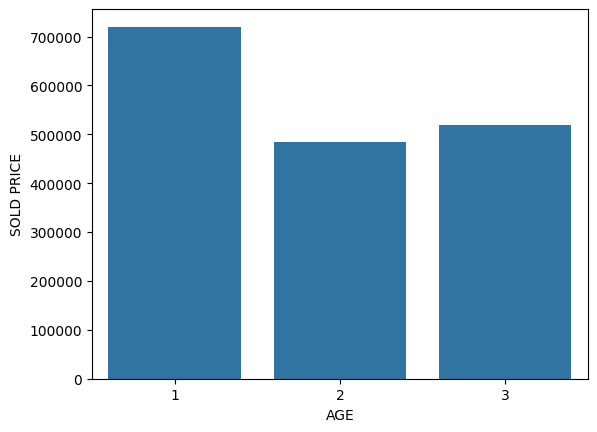

In [16]:
sns.barplot(x='AGE', y='SOLD PRICE', data=soldprice_by_age)

In [17]:
soldprice_by_age_role = (ipl_auction_df.groupby(['AGE', 'PLAYING ROLE'])['SOLD PRICE'].mean().reset_index())
soldprice_by_age_role

,AGE,PLAYING ROLE,SOLD PRICE
0,1,Allrounder,5.875000e+05
1,1,Batsman,1.110000e+06
2,1,Bowler,5.177143e+05
3,2,Allrounder,4.494000e+05
4,2,Batsman,6.547619e+05
5,2,Bowler,3.979310e+05
6,2,W. Keeper,4.677273e+05
7,3,Allrounder,7.666667e+05
8,3,Batsman,4.576923e+05
9,3,Bowler,4.143750e+05


In [18]:
soldprice_comparison = soldprice_by_age_role.merge(soldprice_by_age, on='AGE')
soldprice_comparison

,AGE,PLAYING ROLE,SOLD PRICE_x,SOLD PRICE_y
0,1,Allrounder,5.875000e+05,720250.000000
1,1,Batsman,1.110000e+06,720250.000000
2,1,Bowler,5.177143e+05,720250.000000
3,2,Allrounder,4.494000e+05,484534.883721
4,2,Batsman,6.547619e+05,484534.883721
5,2,Bowler,3.979310e+05,484534.883721
6,2,W. Keeper,4.677273e+05,484534.883721
7,3,Allrounder,7.666667e+05,520178.571429
8,3,Batsman,4.576923e+05,520178.571429
9,3,Bowler,4.143750e+05,520178.571429


In [19]:
soldprice_comparison.rename(columns={'SOLD PRICE_x': 'SOLD_PRICE_AGE_ROLE', 'SOLD PRICE_y': 'SOLD_PRICE_AGE'}, inplace=True)
soldprice_comparison.head(5)

,AGE,PLAYING ROLE,SOLD_PRICE_AGE_ROLE,SOLD_PRICE_AGE
0,1,Allrounder,5.875000e+05,720250.000000
1,1,Batsman,1.110000e+06,720250.000000
2,1,Bowler,5.177143e+05,720250.000000
3,2,Allrounder,4.494000e+05,484534.883721
4,2,Batsman,6.547619e+05,484534.883721


In [20]:
soldprice_comparison['Change'] = soldprice_comparison.apply(lambda rec: (rec.SOLD_PRICE_AGE_ROLE - rec.SOLD_PRICE_AGE) / rec.SOLD_PRICE_AGE, axis=1)
soldprice_comparison

,AGE,PLAYING ROLE,SOLD_PRICE_AGE_ROLE,SOLD_PRICE_AGE,Change
0,1,Allrounder,5.875000e+05,720250.000000,-0.184311
1,1,Batsman,1.110000e+06,720250.000000,0.541132
2,1,Bowler,5.177143e+05,720250.000000,-0.281202
3,2,Allrounder,4.494000e+05,484534.883721,-0.072513
4,2,Batsman,6.547619e+05,484534.883721,0.351320
5,2,Bowler,3.979310e+05,484534.883721,-0.178736
6,2,W. Keeper,4.677273e+05,484534.883721,-0.034688
7,3,Allrounder,7.666667e+05,520178.571429,0.473853
8,3,Batsman,4.576923e+05,520178.571429,-0.120125
9,3,Bowler,4.143750e+05,520178.571429,-0.203399


<Axes: xlabel='AGE', ylabel='SOLD_PRICE_AGE_ROLE'>

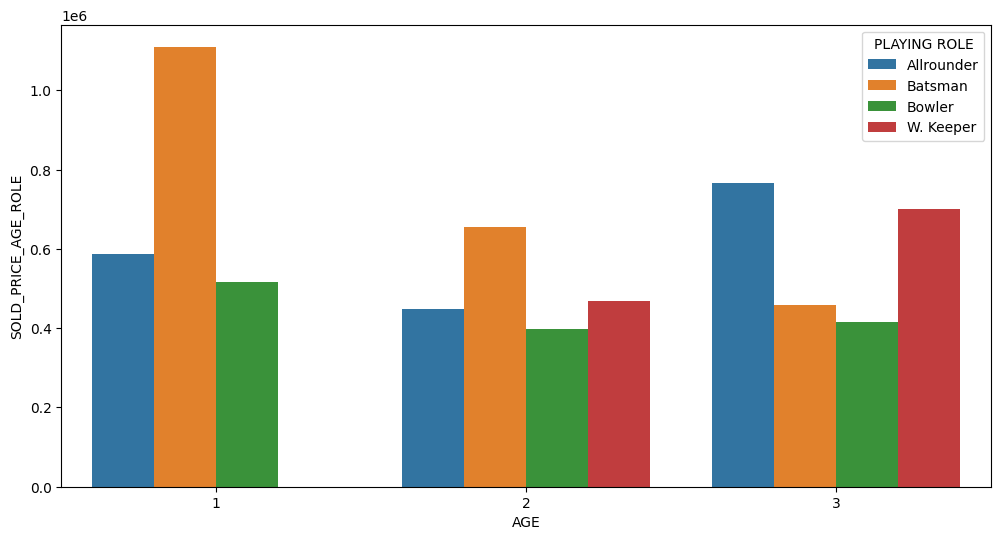

In [32]:
plt.figure(figsize=(12,6))
sns.barplot(x='AGE', y='SOLD_PRICE_AGE_ROLE', hue='PLAYING ROLE', data=soldprice_comparison)